In [1]:
# =====================
# Core Libraries
# =====================
import numpy as np
import pandas as pd

# =====================
# Visualization
# =====================
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# Preprocessing
# =====================
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer

# =====================
# Model Selection & Tuning
# =====================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# =====================
# Regression Models
# =====================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor

# =====================
# Classification Models
# =====================
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# =====================
# Pipelines
# =====================
from sklearn.pipeline import Pipeline

# =====================
# Metrics
# =====================
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             roc_auc_score, precision_score,
                             recall_score, f1_score)

# =====================
# Other Useful Tools
# =====================
from sklearn.datasets import make_regression
from numpy import log1p


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


<Axes: xlabel='job', ylabel='y'>

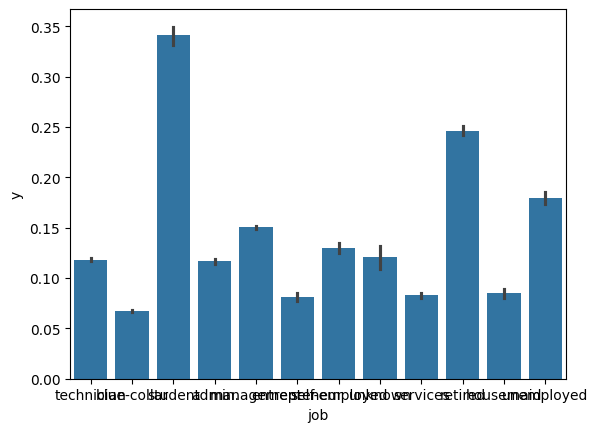

In [ ]:
sns.barplot(data=data,x="job" , y="y" )

<Axes: xlabel='housing', ylabel='y'>

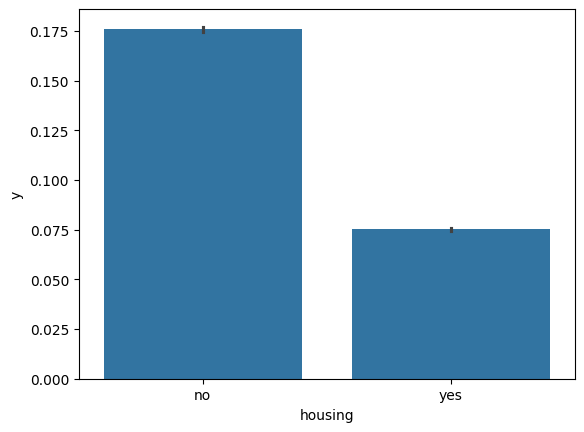

In [7]:
sns.barplot(data=data,x="housing" , y="y" )

<Axes: xlabel='loan', ylabel='y'>

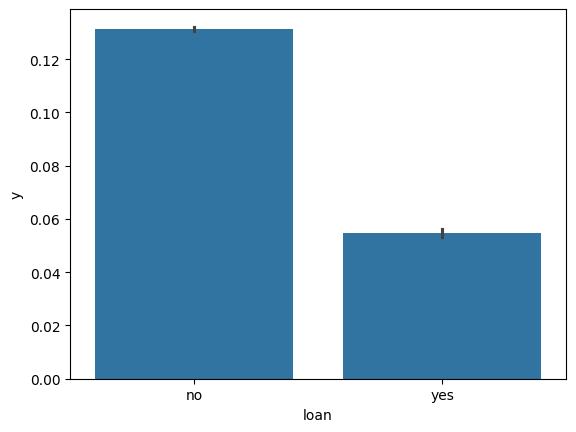

In [8]:
sns.barplot(data=data,x="loan" , y="y" )

In [20]:
for col in data.columns:
    uniques = data[col].unique()  # get unique values
    print(f"This is count of values for {col}: length: {len(uniques)} | values: {uniques}")


This is count of values for id: length: 750000 | values: [     0      1      2 ... 749997 749998 749999]
This is count of values for age: length: 78 | values: [42 38 36 27 26 24 39 50 46 32 37 57 33 47 35 49 77 40 54 56 51 30 67 58
 59 45 43 29 48 31 28 34 60 52 41 81 23 62 53 72 55 25 44 61 63 69 75 71
 64 22 83 70 80 21 65 74 68 19 73 66 79 20 84 86 76 18 82 78 87 85 88 94
 93 89 92 95 90 91]
This is count of values for job: length: 12 | values: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
This is count of values for marital: length: 3 | values: ['married' 'single' 'divorced']
This is count of values for education: length: 4 | values: ['secondary' 'primary' 'tertiary' 'unknown']
This is count of values for default: length: 2 | values: ['no' 'yes']
This is count of values for balance: length: 8217 | values: [    7   514   602 ... 13023  4003  8218]
This is count of values for housin

In [22]:
x = data.drop("y" ,axis=1)
y = data["y"]

In [25]:
cat_feature = ["job", "marital","education" , "default" , "housing","loan" ,"contact" ,"month","poutcome"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x  ,y , random_state=42,test_size=0.2)

In [28]:
# Create CatBoost model
from catboost import CatBoostClassifier


model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    cat_features=cat_feature,
    verbose=100
)

In [ ]:
# Train


model.fit(x_train, y_train, cat_features=cat_feature)

# Predict
y_pred = model.predict(x_test)

# Evaluate



0:	learn: 0.6044572	total: 626ms	remaining: 5m 12s
100:	learn: 0.1607080	total: 44.3s	remaining: 2m 54s
200:	learn: 0.1533446	total: 1m 26s	remaining: 2m 8s
300:	learn: 0.1498677	total: 2m 9s	remaining: 1m 25s
400:	learn: 0.1474861	total: 2m 52s	remaining: 42.6s
499:	learn: 0.1455619	total: 3m 35s	remaining: 0us


NameError: name 'accuracy_score' is not defined

In [31]:
test = pd.read_csv("test.csv")

In [ ]:
test

In [32]:
y_pred = model.predict(test)

In [33]:
submission = pd.DataFrame({
    "id": test["id"],
    "y": y_pred
})

In [34]:
submission.to_csv("submission.csv",index=False)